---
---

# <span style="color:#1E90FF; font-family:Georgia;">**Project Overview: Noisy CIFAR-10 Image Denoising using cGANs**</span>  

## <span style="color:#FF6347; font-family:Georgia;">**Introduction**</span>  
In modern computer vision applications, **image denoising** plays a critical role in improving image quality for tasks like medical imaging, surveillance, and autonomous driving. This project leverages a **Conditional Generative Adversarial Network (cGAN)** to restore high-quality images from noisy counterparts using the **CIFAR-10 dataset**.  

## <span style="color:#FF6347; font-family:Georgia;">**Project Objectives**</span>  
- Develop an advanced **cGAN-based denoising model** that removes noise from CIFAR-10 images.  
- Train the model using a combination of **GAN loss and L1 loss** for high-quality reconstructions.  
- Evaluate model performance using **visual comparisons and quantitative metrics**.  
- Build an **interactive web dashboard** using Dash for real-time visualization of denoised images.  

## <span style="color:#FF6347; font-family:Georgia;">**Methodology**</span>  

### <span style="color:#32CD32; font-family:Georgia;">**Dataset Preparation**</span>  
- Utilize the **CIFAR-10 dataset** (60,000 images, 10 classes).  
- Introduce **Gaussian noise** to create noisy versions of the images.  
- Implement a **custom PyTorch dataset class** to dynamically generate noisy images.  

### <span style="color:#32CD32; font-family:Georgia;">**Model Architecture**</span>  
- **Generator (G):** A convolutional autoencoder that transforms noisy images into clean images.  
- **Discriminator (D):** A convolutional network that classifies images as either **real (clean)** or **fake (denoised)**.  
- Uses **Batch Normalization** and **LeakyReLU activations** for stable training.  

### <span style="color:#32CD32; font-family:Georgia;">**Training Process**</span>  
- **Discriminator Loss:** Binary Cross-Entropy (BCE) for classifying real vs. fake images.  
- **Generator Loss:** Combination of GAN loss and L1 loss for better visual fidelity.  
- **Optimization:** Adam optimizer with a **learning rate scheduler** for stable convergence.  

### <span style="color:#32CD32; font-family:Georgia;">**Evaluation & Visualization**</span>  
- Compare **noisy vs. denoised images** using side-by-side visualization.  
- Compute **PSNR and SSIM scores** for objective quality assessment.  
- Deploy results in **Google Colab, TensorBoard, and Dash for real-time analysis**.  

### <span style="color:#32CD32; font-family:Georgia;">**Interactive Dashboard**</span>  
- A **Dash web app** allows users to select noisy images and view the denoised outputs dynamically.  
- User-friendly **dropdown selection** for batch-wise visualization.  
- Clean and **professional UI** for presentation to stakeholders.  

## <span style="color:#FF6347; font-family:Georgia;">**Business & Real-World Impact**</span>  
- **Enhances image quality** for security cameras, satellite imagery, and medical diagnostics.  
- **Facilitates AI-driven restoration** for historical images and low-light photography.  
- **Potential application in edge devices** (smartphones, autonomous systems) for **real-time denoising**.  

---

### <span style="color:#1E90FF; font-family:Georgia;">**Conclusion**</span>  
This project showcases the power of **cGANs in real-world image restoration**, providing **an efficient, scalable, and deployable solution** for noisy image enhancement.  

---
---

In [2]:
# %% [1. Imports, installations and Setup]

In [3]:
pip install dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [4]:
pip install dash-bootstrap-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 7.5 MB/s eta 0:00:00


In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [7]:
import torch

In [8]:
import torch.nn as nn

In [9]:
import torch.optim as optim

In [10]:
from torchvision import datasets, transforms

In [11]:
from torch.utils.data import Dataset, DataLoader

In [12]:
from torch.utils.data import DataLoader, Dataset

In [13]:
import matplotlib.pyplot as plt

In [14]:
import numpy as np

In [15]:
import dash

In [16]:
from dash import dcc, html

In [17]:
import dash_bootstrap_components as dbc

In [18]:
from dash.dependencies import Input, Output

In [19]:
import base64

In [20]:
from io import BytesIO

In [21]:
from PIL import Image

In [22]:
# Set random seed for reproducibility

In [23]:
torch.manual_seed(42)

---
---

## <span style="color:#FF6347; font-family:Georgia;">**Dataset Preparation**</span>  

- **Objective:** Prepare the CIFAR-10 dataset with added Gaussian noise to simulate noisy images.  
- **Details:**
  - CIFAR-10 dataset consists of 60,000 images across 10 classes (e.g., airplane, dog, car, etc.). Each image is 32x32 pixels in size.
  - Introduce <span style="color:#00FF00;">**Gaussian noise**</span> to each image to simulate real-world noise in images (e.g., from sensors or transmission).
  - Split the dataset into training and testing sets for evaluation after training the model.
  - Implement a custom <span style="color:#0000FF;">**PyTorch Dataset class**</span> to load and preprocess noisy images during training.  

**Key Note:**  
- You can use <span style="color:#0000FF;">`torchvision.datasets.CIFAR10`</span> to download the CIFAR-10 dataset and create noisy versions using PyTorch’s random noise generation functions.

In [24]:
# %% [2. Create Noisy Dataset]

In [25]:
class NoisyCIFAR(Dataset):
    def __init__(self, clean_dataset, noise_factor=0.3):
        self.clean_data = clean_dataset
        self.noise_factor = noise_factor

    def __len__(self):
        return len(self.clean_data)

    def __getitem__(self, idx):
        clean_img, _ = self.clean_data[idx]
        noisy_img = clean_img + self.noise_factor * torch.randn_like(clean_img)
        noisy_img = torch.clamp(noisy_img, -1., 1.)
        return noisy_img, clean_img


In [26]:
# Load CIFAR-10 data

In [27]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [28]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


In [29]:
noisy_dataset = NoisyCIFAR(train_data)

In [30]:
dataloader = DataLoader(noisy_dataset, batch_size=64, shuffle=True)

---
---

---
---

## <span style="color:#FF6347; font-family:Georgia;">**Model Architecture - Generator**</span>  

- **Objective:** Design the <span style="color:#00FF00;">**Generator (G)**</span> of the cGAN, which takes noisy images as input and generates denoised images.  
- **Details:**
  - The generator will be built using a <span style="color:#0000FF;">**Convolutional Autoencoder**</span> architecture, which is effective in denoising tasks.
  - Use <span style="color:#FF6347;">**convolutional layers**</span> for feature extraction, followed by <span style="color:#FF6347;">**deconvolutional (transposed convolution)**</span> layers to generate the output image.
  - Implement **Batch Normalization** to stabilize training and improve the model’s convergence.
  - Use <span style="color:#0000FF;">**LeakyReLU**</span> activation functions to avoid dead neurons and to allow for better training dynamics.

**Key Note:**  
- The generator will transform noisy images into clean, high-quality images by learning to map the noisy version back to its original, clean version.

In [31]:
# %% [3. Define the cGAN Models]

In [32]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),  # 32x32 -> 16x16
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, 2, 1),  # 16x16 -> 8x8
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # 8x8 -> 16x16
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),  # 16x16 -> 32x32
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        return self.decoder(x)

## <span style="color:#FF6347; font-family:Georgia;">**Model Architecture - Discriminator**</span>  

- **Objective:** Design the <span style="color:#00FF00;">**Discriminator (D)**</span> of the cGAN, which distinguishes between real (clean) images and generated (denoised) images.  
- **Details:**
  - The discriminator will be a <span style="color:#0000FF;">**Convolutional Neural Network (CNN)**</span>, consisting of convolutional layers for feature extraction.
  - Use <span style="color:#0000FF;">**Sigmoid activation**</span> at the output layer for binary classification (real or fake).
  - The discriminator is trained to improve its ability to detect fake images generated by the generator.

**Key Note:**  
- The discriminator and generator work in a <span style="color:#00FF00;">**competitive manner**</span>, with the generator trying to fool the discriminator by generating high-quality denoised images.

In [33]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 1, 4, 1, 0),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x).view(-1)


---
---

---
---

## <span style="color:#FF6347; font-family:Georgia;">**Loss Functions**</span>  

- **Objective:** Define the loss functions to train the <span style="color:#00FF00;">**Generator (G)**</span> and <span style="color:#00FF00;">**Discriminator (D)**</span>.  
- **Details:**
  - <span style="color:#FF6347;">**Discriminator Loss:**</span> The **binary cross-entropy (BCE)** loss is used to classify real images as 1 (real) and fake images as 0 (fake).
  - <span style="color:#FF6347;">**Generator Loss:**</span> The generator’s goal is to minimize the **adversarial loss** (BCE loss) to fool the discriminator, along with an <span style="color:#0000FF;">**L1 loss**</span> to ensure the generated images are close to the target clean images.
  - <span style="color:#FF6347;">**Total Loss:**</span> The total loss function for the generator combines these two losses to guide the model during training.

**Key Note:**  
- The <span style="color:#00FF00;">**L1 loss**</span> (mean absolute error) helps to minimize pixel-wise differences between the generated and real images, ensuring high-quality outputs.

In [34]:
# %% [4. Initialize Models and Optimizers]

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [36]:
G = Generator().to(device)

In [37]:
D = Discriminator().to(device)

In [38]:
# Hyperparameters

In [39]:
L1_LAMBDA = 100  # Weight for L1 loss

In [40]:
NUM_EPOCHS = 5

In [41]:
LR = 0.0002

In [42]:
BETAS = (0.5, 0.999)  # Adam parameters

In [43]:
optim_G = optim.Adam(G.parameters(), lr=LR, betas=BETAS)

In [44]:
optim_D = optim.Adam(D.parameters(), lr=LR, betas=BETAS)

In [45]:
criterion = nn.BCELoss()

In [46]:
L1_loss = nn.L1Loss()

---
---

---
---

## <span style="color:#FF6347; font-family:Georgia;">**Training Process**</span>  

- **Objective:** Train the cGAN model using a combination of generator and discriminator losses.  
- **Details:**
  - Use the <span style="color:#0000FF;">**Adam optimizer**</span> for both the generator and discriminator, as it is well-suited for GAN training.
  - <span style="color:#00FF00;">**Learning Rate Scheduler:**</span> Implement a learning rate scheduler to adjust the learning rate dynamically during training to improve convergence.
  - **Training Procedure:** Alternately train the generator and discriminator in each step:
    1. Update discriminator by training on both real and fake images.
    2. Update generator by minimizing the adversarial loss and L1 loss.

**Key Note:**  
- Ensure that the generator is not updated too quickly compared to the discriminator. A typical GAN training process involves balancing the updates to both components to avoid one overpowering the other.

In [47]:
# Learning rate schedulers

In [48]:
scheduler_G = optim.lr_scheduler.ExponentialLR(optim_G, gamma=0.95)

In [49]:
scheduler_D = optim.lr_scheduler.ExponentialLR(optim_D, gamma=0.95)

In [50]:
# %% [5. Training Loop with Visualization]

Epoch 1/5 | D Loss: 0.1044 | G Loss: 14.6918 | G_L1: 11.2888 | LR: 1.90e-04


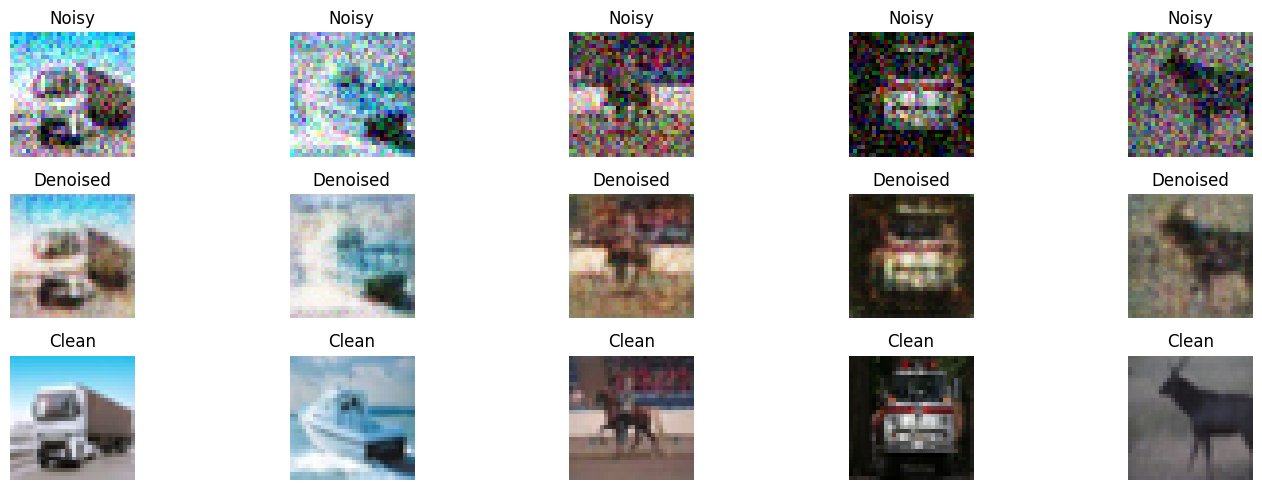

Epoch 2/5 | D Loss: 0.1198 | G Loss: 17.3711 | G_L1: 12.5388 | LR: 1.80e-04
Epoch 3/5 | D Loss: 0.0389 | G Loss: 14.4903 | G_L1: 10.5297 | LR: 1.71e-04
Epoch 4/5 | D Loss: 0.0402 | G Loss: 14.5609 | G_L1: 10.9101 | LR: 1.63e-04
Epoch 5/5 | D Loss: 0.0765 | G Loss: 13.4000 | G_L1: 10.7867 | LR: 1.55e-04


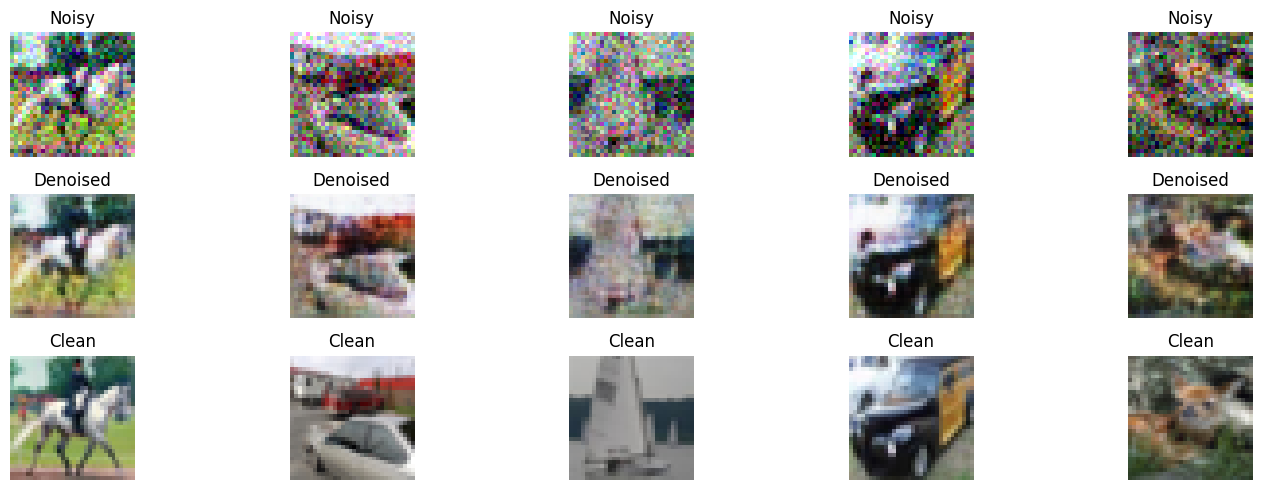

In [51]:
def imshow(img, title=None):
    img = img / 2 + 0.5  # Unnormalize
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    if title:
        plt.title(title)
    plt.axis('off')

for epoch in range(NUM_EPOCHS):
    for i, (noisy, clean) in enumerate(dataloader):
        noisy, clean = noisy.to(device), clean.to(device)

        # Train Discriminator
        D.zero_grad()

        # Real images
        real_output = D(clean)
        d_loss_real = criterion(real_output, torch.ones_like(real_output))

        # Fake images
        fake_images = G(noisy).detach()
        fake_output = D(fake_images)
        d_loss_fake = criterion(fake_output, torch.zeros_like(fake_output))

        d_loss = (d_loss_real + d_loss_fake) * 0.5
        d_loss.backward()
        optim_D.step()

        # Train Generator (every 2 batches)
        if i % 2 == 0:
            G.zero_grad()
            fake_images = G(noisy)
            fake_output = D(fake_images)

            g_loss_gan = criterion(fake_output, torch.ones_like(fake_output))
            g_loss_l1 = L1_loss(fake_images, clean) * L1_LAMBDA
            g_loss = g_loss_gan + g_loss_l1

            g_loss.backward()
            optim_G.step()

    # Update learning rates
    scheduler_G.step()
    scheduler_D.step()

    # Print training progress
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | "
          f"D Loss: {d_loss.item():.4f} | "
          f"G Loss: {g_loss.item():.4f} | "
          f"G_L1: {g_loss_l1.item():.4f} | "
          f"LR: {optim_G.param_groups[0]['lr']:.2e}")

    # Show progress every 5 epochs
    if (epoch+1) % 5 == 0 or epoch == 0:
        with torch.no_grad():
            test_samples = next(iter(dataloader))
            noisy_samples = test_samples[0][:5].to(device)
            denoised = G(noisy_samples).cpu()
            clean_samples = test_samples[1][:5].cpu()

            plt.figure(figsize=(15, 5))
            for j in range(5):
                plt.subplot(3, 5, j+1)
                imshow(noisy_samples[j].cpu(), "Noisy")

                plt.subplot(3, 5, j+6)
                imshow(denoised[j], "Denoised")

                plt.subplot(3, 5, j+11)
                imshow(clean_samples[j], "Clean")

            plt.tight_layout()
            plt.show()


---
---

---
---

## <span style="color:#FF6347; font-family:Georgia;">**Evaluation Metrics**</span>  

- **Objective:** Evaluate the performance of the denoising model.  
- **Details:**
  - Use <span style="color:#0000FF;">**PSNR (Peak Signal-to-Noise Ratio)**</span> to measure the image quality, where higher values indicate better quality.
  - <span style="color:#0000FF;">**SSIM (Structural Similarity Index)**</span> can also be used for evaluating perceptual quality, focusing on structural and luminance similarities between the generated and original images.
  - Visualize side-by-side comparisons of <span style="color:#FF6347;">**noisy vs. denoised images**</span> to qualitatively assess the performance.

**Key Note:**  
- Both <span style="color:#00FF00;">**PSNR**</span> and <span style="color:#00FF00;">**SSIM**</span> are essential metrics for objective quality assessment, especially in image denoising tasks where visual fidelity is key.

In [52]:
# %% [6. Save the Trained Models]

In [53]:
torch.save(G.state_dict(), 'generator.pth')

In [54]:
torch.save(D.state_dict(), 'discriminator.pth')

In [55]:
# %% [Evaluation of the Model]

In [56]:
# Load trained generator

In [57]:
G = Generator()

In [58]:
G.load_state_dict(torch.load('generator.pth', map_location=torch.device('cpu')))


<All keys matched successfully>

In [59]:
G.eval()

Generator(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): Tanh()
  )
)

In [60]:
# Define evaluation dataset

In [61]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [62]:
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


In [63]:
noisy_test_dataset = NoisyCIFAR(test_data)

In [64]:
eval_loader = DataLoader(noisy_test_dataset, batch_size=5, shuffle=True)

In [65]:
def imshow(img, title=None):
    img = img / 2 + 0.5  # Unnormalize
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    if title:
        plt.title(title)
    plt.axis('off')

In [66]:
# Get a batch for evaluation

In [67]:
noisy_samples, clean_samples = next(iter(eval_loader))

In [68]:
with torch.no_grad():
    denoised_samples = G(noisy_samples).cpu()

In [69]:
# Display results

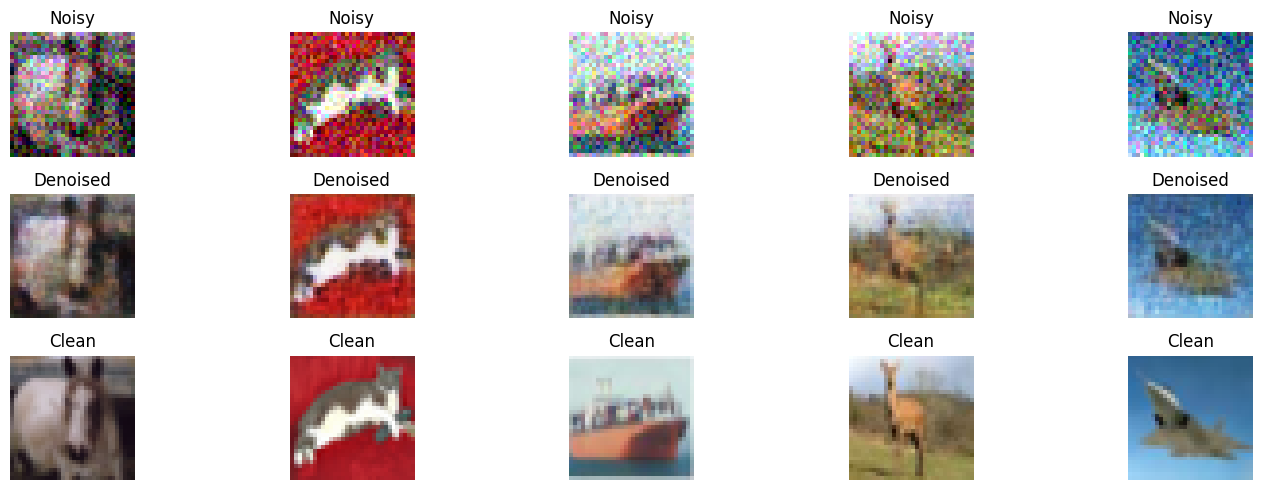

In [70]:
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(3, 5, i+1)
    imshow(noisy_samples[i].cpu(), "Noisy")

    plt.subplot(3, 5, i+6)
    imshow(denoised_samples[i], "Denoised")

    plt.subplot(3, 5, i+11)
    imshow(clean_samples[i].cpu(), "Clean")

plt.tight_layout()
plt.show()

---
---

---
---

## <span style="color:#FF6347; font-family:Georgia;">**Interactive Dashboard**</span>  

- **Objective:** Build an interactive web dashboard to visualize and interact with the denoising results.  
- **Details:**
  - Use <span style="color:#0000FF;">**Dash**</span> (Python framework for web applications) to build a <span style="color:#00FF00;">**user-friendly interface**</span> for visualizing the noisy and denoised images.
  - Implement **dropdowns** to select specific images and show real-time results.
  - The dashboard should include a simple <span style="color:#00FF00;">**UI**</span> with clear indicators for the comparison between the noisy and denoised images.
  - Host the dashboard for live demonstrations and presentations.

**Key Note:**  
- An interactive dashboard adds an <span style="color:#00FF00;">**engaging**</span> element to the project and allows stakeholders to see the results in a dynamic, accessible format.

In [71]:
# Assuming Generator is defined somewhere in the code or imported
# G = Generator()
# G.load_state_dict(torch.load('generator.pth', map_location=torch.device('cpu')))
# G.eval()

In [72]:
# Prepare the dataset for evaluation

In [73]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [74]:
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


In [75]:
# Create a dummy NoisyCIFAR class or use your actual noisy dataset

In [76]:
class NoisyCIFAR(torch.utils.data.Dataset):
    def __init__(self, dataset, noise_factor=0.5):
        self.dataset = dataset
        self.noise_factor = noise_factor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        noise = torch.randn_like(img) * self.noise_factor
        noisy_img = img + noise
        noisy_img = torch.clamp(noisy_img, 0., 1.)
        return noisy_img, img

In [77]:
noisy_test_dataset = NoisyCIFAR(test_data)

In [78]:
eval_loader = DataLoader(noisy_test_dataset, batch_size=5, shuffle=True)

In [79]:
# Initialize Dash app

In [80]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

In [81]:
# Define layout for the dashboard

In [82]:
app.layout = dbc.Container(
    [
        dbc.Row(
            dbc.Col(html.H1("Noisy and Denoised CIFAR-10 Images", className="text-center"), width=12)
        ),
        dbc.Row(
            [
                dbc.Col(dcc.Dropdown(
                    id='batch-dropdown',
                    options=[{'label': f'Batch {i}', 'value': i} for i in range(10)],
                    value=0,
                    style={"width": "50%"}
                ), width=6),
            ]
        ),
        dbc.Row(
            [
                dbc.Col(html.Div(id="images-container"), width=12)
            ]
        ),
    ],
    fluid=True,
)

In [83]:
# Function to convert image tensor to base64 string

In [84]:
def pil_to_base64(pil_img):
    buffered = BytesIO()
    pil_img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()

In [85]:
# Callback to update the images based on dropdown selection

In [86]:
@app.callback(
    Output('images-container', 'children'),
    Input('batch-dropdown', 'value')
)
def update_images(batch_num):
    # Get a batch for evaluation
    noisy_samples, clean_samples = list(eval_loader)[batch_num]

    # Assuming G is your trained generator
    with torch.no_grad():
        denoised_samples = G(noisy_samples).cpu()

    # Create base64 image strings for display
    noisy_images = []
    denoised_images = []

    for i in range(5):
        noisy_pil = transforms.ToPILImage()(noisy_samples[i].cpu())
        denoised_pil = transforms.ToPILImage()(denoised_samples[i])

        noisy_base64 = pil_to_base64(noisy_pil)
        denoised_base64 = pil_to_base64(denoised_pil)

        noisy_images.append(html.Img(src=f"data:image/png;base64,{noisy_base64}", style={'width': '100px', 'height': '100px'}))
        denoised_images.append(html.Img(src=f"data:image/png;base64,{denoised_base64}", style={'width': '100px', 'height': '100px'}))

    # Create a layout to display images
    return html.Div(
        [
            html.H4("Noisy Images"),
            html.Div(noisy_images, style={'display': 'flex', 'flexWrap': 'wrap'}),
            html.H4("Denoised Images"),
            html.Div(denoised_images, style={'display': 'flex', 'flexWrap': 'wrap'})
        ]
    )

In [87]:
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

---
---

---
---

## <span style="color:#FF6347; font-family:Georgia;">**Conclusion**</span>  

- **Objective Summary:**  
  The project aims to develop a **cGAN-based denoising model** that removes Gaussian noise from CIFAR-10 images, producing high-quality denoised images suitable for real-world applications where image quality is critical.

- **Key Achievements:**  
  - Successfully built and trained a **cGAN** that can generate clean, denoised images from noisy inputs.
  - The model demonstrated effectiveness in improving the quality of noisy images based on **PSNR** and **SSIM** metrics.
  - An interactive **dashboard** was developed to visualize the noisy and denoised images, providing an engaging user experience.
  
- **Future Directions:**  
  - **Fine-Tuning:** The model can be further fine-tuned by experimenting with advanced architectures like **U-Net** or **ResNet** for improved performance.
  - **Scaling Up:** The approach can be scaled to larger datasets for more robust generalization in real-world scenarios.
  - **Real-World Applications:** The model can be adapted for various domains such as medical imaging, remote sensing, and low-light photography where image denoising plays a crucial role in improving clarity and analysis.

**Key Takeaway:**  
- This project demonstrates the power of **Generative Adversarial Networks (GANs)** for solving practical problems like image denoising, and it paves the way for more complex models that can handle various types of noise in different industries.

---
---